In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
crime = pd.read_csv('../BDA/CSV/crime.csv')
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [ ]:
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


In [ ]:
crime_sp = crime.set_index('REPORTED_DATE')
crime_sp.sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2012-01-02 00:06:00,414815,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,47176,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,75798,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,46063,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,435334,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...,...
2017-09-29 03:58:00,454315,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0
2017-09-29 03:58:00,454304,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0
2017-09-29 04:12:00,454656,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0


In [ ]:
crime_sp12 = crime_sp.loc['2012'].sort_index()
crime_sp13 = crime_sp.loc['2013'].sort_index()
crime_sp14 = crime_sp.loc['2014'].sort_index()
crime_sp15 = crime_sp.loc['2015'].sort_index()
crime_sp16 = crime_sp.loc['2016'].sort_index()
crime_sp17 = crime_sp.loc['2017'].sort_index()

## 카테고리별 범죄 발생 수 비교
- 전체 데이터에서 카테고리별 개수를 비교했다.
- 교통사고가 제일 많고 살인이 제일 적은 것을 확인 가능하다.

<BarContainer object of 15 artists>

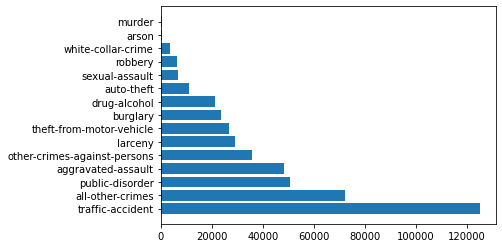

In [ ]:
plt.barh(list(crime['OFFENSE_CATEGORY_ID'].unique()),crime['OFFENSE_CATEGORY_ID'].value_counts())

# 교통사고의 연도별 발생 비교
- 2014년에 교통사고가 제일 많이 발생한 것을 확인할 수 있다.
- 2012~2014년에 증가하다가 2014년 이후로 감소하는 것을 보고 2015년에 어떠한 정책이 발행해서 줄어들었을 것이라고 추측 가능하다.

<BarContainer object of 6 artists>

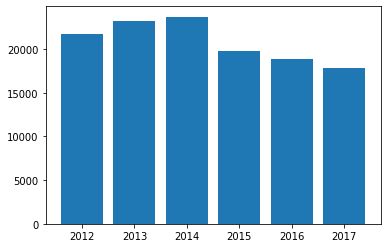

In [ ]:
crime['year'] = crime['REPORTED_DATE'].dt.year #각 행의 연도만 추출
traffic = crime.query('OFFENSE_CATEGORY_ID=="traffic-accident"')
plt.bar(traffic['year'].unique(),traffic['year'].value_counts())

# 2014년 교통사고 종류별 발생 비교

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

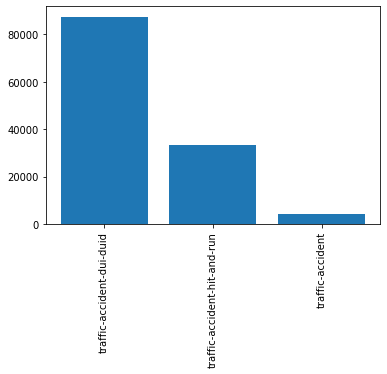

In [ ]:
traffic14 = traffic.query('year == 2014')
x = list(traffic14['OFFENSE_TYPE_ID'].unique())
y = traffic['OFFENSE_TYPE_ID'].value_counts()
plt.bar(x,y)
plt.xticks(rotation=90)


C:\Users\kimht\AppData\Local\Temp\ipykernel_1076\3073528225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic14['month']=traffic['REPORTED_DATE'].dt.month


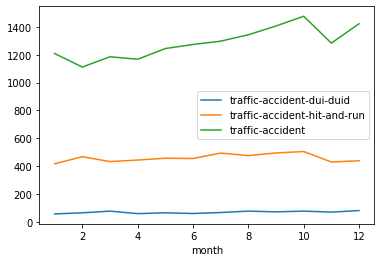

In [ ]:
traffic14['month']=traffic['REPORTED_DATE'].dt.month
traffic14.query('OFFENSE_TYPE_ID=="traffic-accident-dui-duid"').groupby('month')['IS_TRAFFIC'].sum().plot()
traffic14.query('OFFENSE_TYPE_ID=="traffic-accident-hit-and-run"').groupby('month')['IS_TRAFFIC'].sum().plot()
traffic14.query('OFFENSE_TYPE_ID=="traffic-accident"').groupby('month')['IS_TRAFFIC'].sum().plot()
plt.legend(labels = ["traffic-accident-dui-duid","traffic-accident-hit-and-run","traffic-accident"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


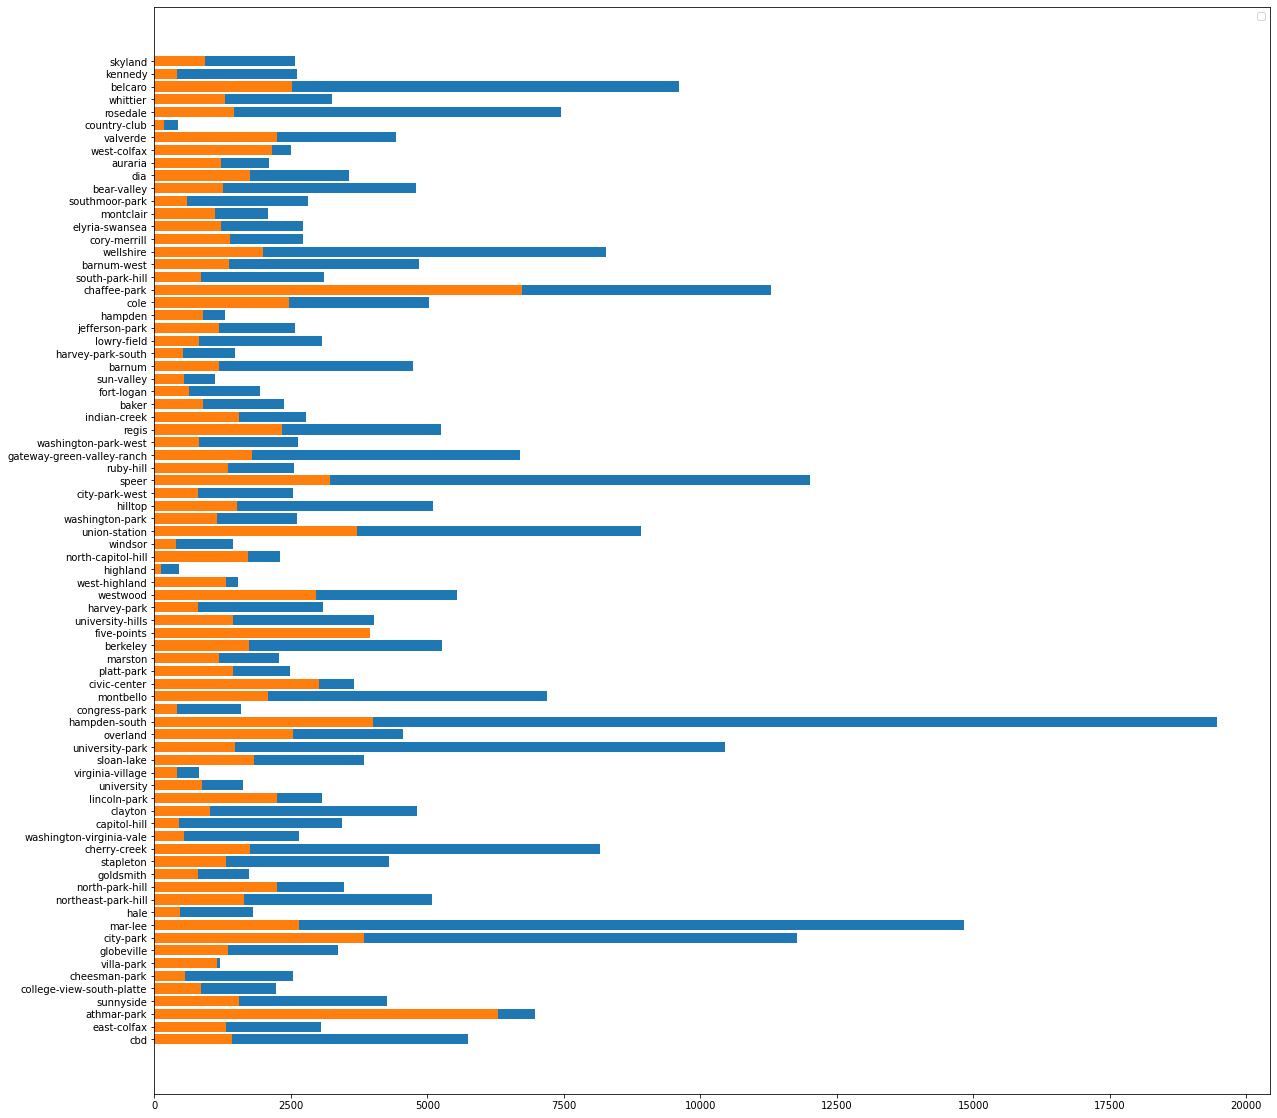

In [ ]:
plt.figure(figsize = (20,20))
plt.barh(list(crime['NEIGHBORHOOD_ID'].unique()),crime.groupby('NEIGHBORHOOD_ID')['IS_CRIME'].sum())
plt.barh(list(crime['NEIGHBORHOOD_ID'].unique()),crime.groupby('NEIGHBORHOOD_ID')['IS_TRAFFIC'].sum())
plt.legend()